# 

#Notes
- when running t tests, check the  variance of the variables and use the welch t test if the variance is not equal (or otherwise equivalent method for unequal variance)



In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/temperature.csv')


# set datetime as index
df.set_index('datetime', inplace=True)

# only keep columns for Los Angeles, New York, Charlotte, and Chicago
df = df[['Los Angeles', 'New York', 'Charlotte', 'Chicago']]
df.head(50)

# print range of dates in a readable format and number of days and number of data points
print(pd.to_datetime(df.index.min()), pd.to_datetime(df.index.max()))
print(len(df.index))

# print number of data points per city
print(df.count())

# do a sumif on number of days for each city where temperature is NA
df.isna().sum()

# for data where the column name is New York and temperature is NA, print the datetime if its the first instance, and if not store the difference in  hours between the current instance and the previous instance in  a new numpy array then print summary statistics of that array with mins, max, median

# Get timestamps where NY temperature is NA
ny_na = df[df['New York'].isna()]
la_na = df[df['Los Angeles'].isna()]
chicago_na = df[df['Chicago'].isna()]
charlotte_na = df[df['Charlotte'].isna()]
timestamps = ny_na.index
timestamps_la = la_na.index
timestamps_chicago = chicago_na.index
timestamps_charlotte = charlotte_na.index

# Convert timestamps to datetime if they aren't already
timestamps = pd.to_datetime(timestamps)
timestamps_la = pd.to_datetime(timestamps_la)
timestamps_chicago = pd.to_datetime(timestamps_chicago)
timestamps_charlotte = pd.to_datetime(timestamps_charlotte)
print(timestamps)
print(timestamps_la)
print(timestamps_chicago)
print(timestamps_charlotte)

# Calculate time differences in hours between consecutive missing values
time_diffs = np.diff(timestamps) / np.timedelta64(1, 'h')
time_diffs_la = np.diff(timestamps_la) / np.timedelta64(1, 'h')
time_diffs_chicago = np.diff(timestamps_chicago) / np.timedelta64(1, 'h')
time_diffs_charlotte = np.diff(timestamps_charlotte) / np.timedelta64(1, 'h')

# Print first missing timestamp
print("First missing temperature reading:", timestamps[0])

# Print summary statistics of the time gaps
print("\nTime gap statistics (in hours):")
print(f"Minimum: {time_diffs.min():.2f}")
print(f"Maximum: {time_diffs.max():.2f}")
print(f"Median:  {np.median(time_diffs):.2f}")
print(f"Mean:    {np.mean(time_diffs):.2f}")
print(f"Std:     {np.std(time_diffs):.2f}")

# Optional: show distribution of gaps
print("\nValue counts of common gaps:")
unique_gaps, counts = np.unique(time_diffs, return_counts=True)
for gap, count in zip(unique_gaps[:5], counts[:5]):
    print(f"{gap:.1f} hours: {count} occurrences")



2012-10-01 12:00:00 2017-11-30 00:00:00
45253
Los Angeles    45250
New York       44460
Charlotte      45250
Chicago        45250
dtype: int64
DatetimeIndex(['2012-10-01 12:00:00', '2017-10-28 01:00:00',
               '2017-10-28 02:00:00', '2017-10-28 03:00:00',
               '2017-10-28 04:00:00', '2017-10-28 05:00:00',
               '2017-10-28 06:00:00', '2017-10-28 07:00:00',
               '2017-10-28 08:00:00', '2017-10-28 09:00:00',
               ...
               '2017-11-29 15:00:00', '2017-11-29 16:00:00',
               '2017-11-29 17:00:00', '2017-11-29 18:00:00',
               '2017-11-29 19:00:00', '2017-11-29 20:00:00',
               '2017-11-29 21:00:00', '2017-11-29 22:00:00',
               '2017-11-29 23:00:00', '2017-11-30 00:00:00'],
              dtype='datetime64[ns]', name='datetime', length=793, freq=None)
DatetimeIndex(['2012-10-01 12:00:00', '2013-03-11 07:00:00',
               '2013-03-11 08:00:00'],
              dtype='datetime64[ns]', name='datet

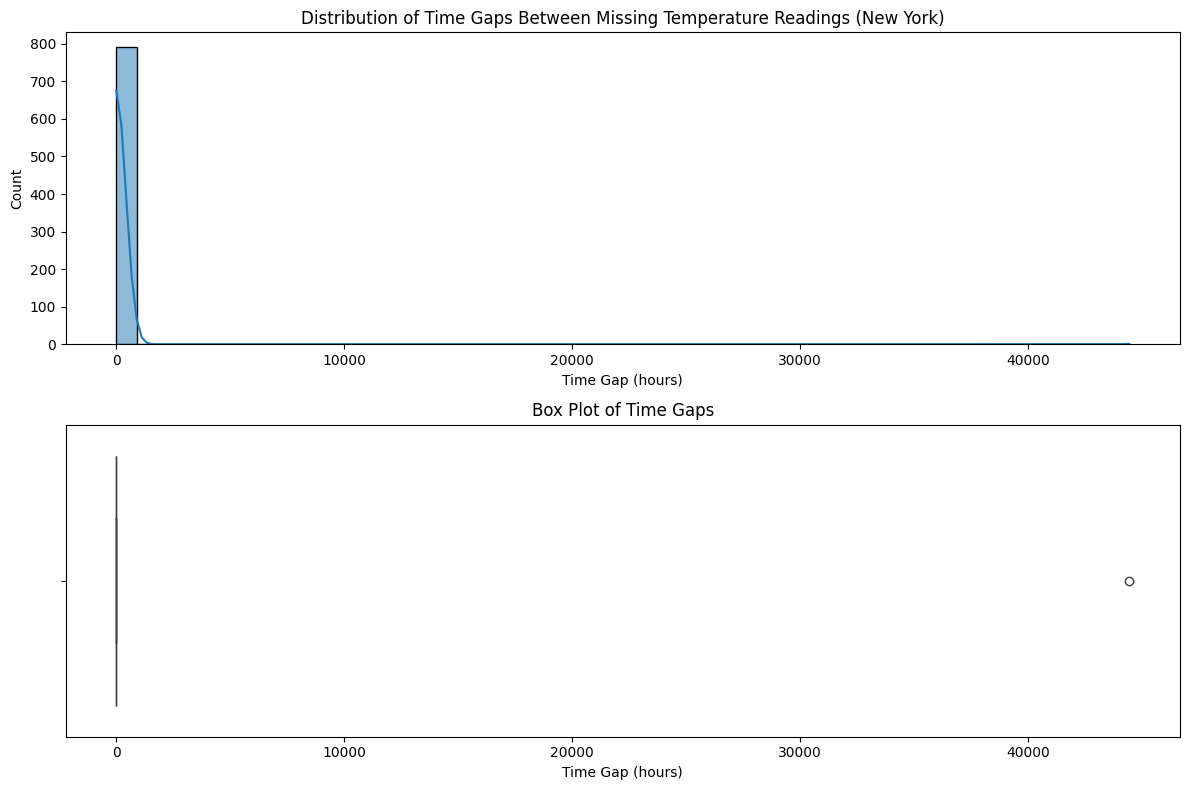

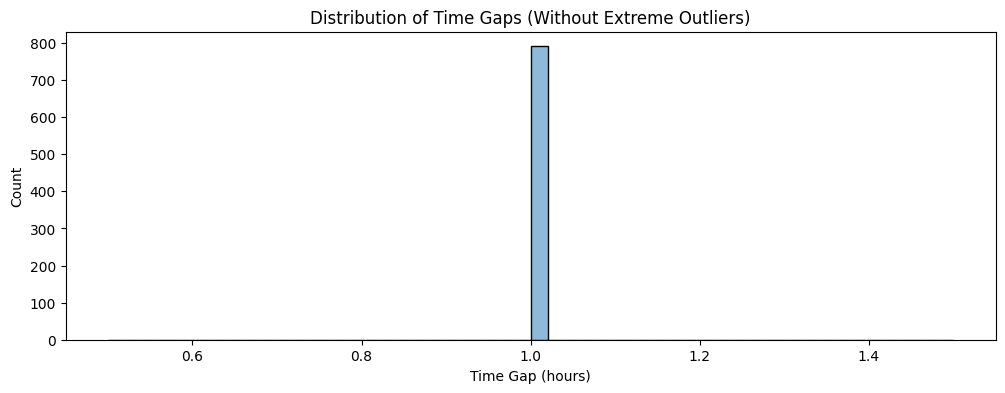

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for better visualization
#plt.style.use('seaborn')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Histogram with KDE
sns.histplot(data=time_diffs, bins=50, kde=True, ax=ax1)
ax1.set_title('Distribution of Time Gaps Between Missing Temperature Readings (New York)')
ax1.set_xlabel('Time Gap (hours)')
ax1.set_ylabel('Count')

# Box plot to show outliers
sns.boxplot(x=time_diffs, ax=ax2)
ax2.set_title('Box Plot of Time Gaps')
ax2.set_xlabel('Time Gap (hours)')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Optional: If you want to see the distribution without extreme outliers
# Calculate Q1, Q3, and IQR
Q1 = np.percentile(time_diffs, 25)
Q3 = np.percentile(time_diffs, 75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Create a filtered version without extreme outliers
filtered_diffs = time_diffs[time_diffs <= upper_bound]

# Plot the filtered distribution
plt.figure(figsize=(12, 4))
sns.histplot(data=filtered_diffs, bins=50, kde=True)
plt.title('Distribution of Time Gaps (Without Extreme Outliers)')
plt.xlabel('Time Gap (hours)')
plt.ylabel('Count')
plt.show()


# 

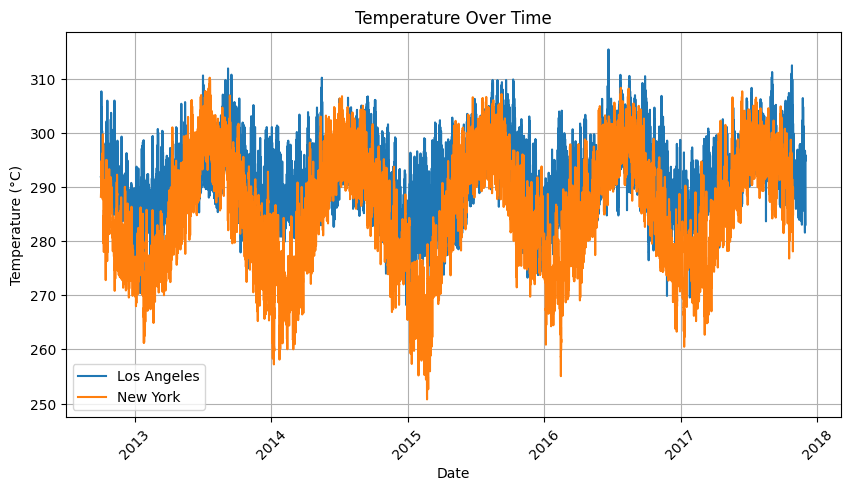

In [6]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

df = pd.read_csv('data/temperature.csv', parse_dates=['datetime'])


# set datetime as index
df.set_index('datetime', inplace=True)

# only keep columns for Los Angeles, New York, Charlotte, and Chicago
#df = df[['Los Angeles', 'New York', 'Charlotte', 'Chicago']]
df = df[['Los Angeles', 'New York']]

plt.figure(figsize=(10, 5))
for city in df.columns:
    plt.plot(df.index, df[city], label=city)

plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Over Time")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()